In [1]:
import logging

import pandas as pd
import numpy as np

from copairs.map import run_pipeline, aggregate

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
logging.basicConfig(format='%(levelname)s:%(asctime)s:%(name)s:%(message)s')
logging.getLogger("copairs").setLevel(logging.INFO)

In [7]:
subset_corrected = pd.read_parquet("../3.correct/output/subset_profiles_cc_corrected.parquet")
subset_corrected.reset_index(inplace=True, drop=True)
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,...,0.843619,0.076587,0.320472,-0.385526,0.190299,0.455335,0.509991,-1.019452,-0.727796,-0.842709
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,...,-0.553261,-1.089581,-0.339225,-1.516519,-0.441941,-0.130427,-0.575876,0.593761,0.509689,-0.214481
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,...,-0.234735,-0.754526,0.077711,-0.321833,0.405425,0.628227,0.367096,0.264792,-0.726009,-0.754048
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,...,0.015636,-0.494281,-0.287685,-0.627869,-0.710446,-0.636987,-0.199217,-0.135424,-0.290031,0.329685
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,...,-0.037931,-0.722416,-0.448440,-1.166354,-1.939870,-1.752882,-0.387810,-0.074516,0.047316,1.303088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,-2.711810,-3.969504,-0.809101,-2.974631,-2.787255,-0.704379,0.198949,2.074013,0.223548,-0.531547
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.077549,-3.094378,-0.711043,-2.103474,-1.919203,-0.485693,0.300183,1.795833,-0.029274,-0.503630
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.488542,-3.648642,-0.653825,-2.628841,-2.837851,-0.915129,0.115583,2.372840,0.351046,0.082553
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-2.968013,-4.203432,-0.806062,-2.797244,-2.399043,-0.965500,0.605841,2.384713,0.194849,0.017739


In [8]:
# adding dummy index spped up calculations by skipping positive pairs between controls

subset_corrected["Metadata_dummy_index"] = subset_corrected.index
subset_corrected.loc[subset_corrected["Metadata_pert_type"] == "trt", "Metadata_dummy_index"] = -1
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Metadata_dummy_index
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,...,0.076587,0.320472,-0.385526,0.190299,0.455335,0.509991,-1.019452,-0.727796,-0.842709,-1
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,...,-1.089581,-0.339225,-1.516519,-0.441941,-0.130427,-0.575876,0.593761,0.509689,-0.214481,-1
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,...,-0.754526,0.077711,-0.321833,0.405425,0.628227,0.367096,0.264792,-0.726009,-0.754048,-1
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,...,-0.494281,-0.287685,-0.627869,-0.710446,-0.636987,-0.199217,-0.135424,-0.290031,0.329685,-1
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,...,-0.722416,-0.448440,-1.166354,-1.939870,-1.752882,-0.387810,-0.074516,0.047316,1.303088,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,-3.969504,-0.809101,-2.974631,-2.787255,-0.704379,0.198949,2.074013,0.223548,-0.531547,19138
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-3.094378,-0.711043,-2.103474,-1.919203,-0.485693,0.300183,1.795833,-0.029274,-0.503630,19139
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-3.648642,-0.653825,-2.628841,-2.837851,-0.915129,0.115583,2.372840,0.351046,0.082553,19140
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-4.203432,-0.806062,-2.797244,-2.399043,-0.965500,0.605841,2.384713,0.194849,0.017739,19141


In [9]:
unique_trts = subset_corrected[subset_corrected.Metadata_pert_type=="trt"]["Metadata_JCP2022"].unique()
unique_trts

array(['JCP2022_900006', 'JCP2022_900176', 'JCP2022_900198', ...,
       'JCP2022_915028', 'JCP2022_915030', 'JCP2022_915053'], dtype=object)

In [10]:
metadata = subset_corrected.filter(regex="^Metadata_")
feature_values = subset_corrected.filter(regex="^(?!Metadata_)").values

In [11]:
pos_sameby = ["Metadata_JCP2022", "Metadata_dummy_index"]
pos_diffby = ["Metadata_Well"]

neg_sameby = []
neg_diffby = ["Metadata_pert_type"]

null_size = 10000

In [12]:
result = run_pipeline(
    metadata,
    feature_values, 
    pos_sameby,
    pos_diffby,
    neg_sameby,
    neg_diffby,
    null_size,
    batch_size=100000
)

INFO:2023-05-31 18:49:42,702:copairs:Indexing metadata...
INFO:2023-05-31 18:49:42,769:copairs:Finding positive pairs...
INFO:2023-05-31 18:49:43,069:copairs:dropping dups...
INFO:2023-05-31 18:49:43,072:copairs:Finding negative pairs...
INFO:2023-05-31 18:50:03,391:copairs:dropping dups...
INFO:2023-05-31 18:50:44,600:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-05-31 18:50:45,280:copairs:Computing negative similarities...


  0%|          | 0/161 [00:00<?, ?it/s]

INFO:2023-05-31 18:54:26,094:copairs:Building rank lists...
INFO:2023-05-31 18:54:45,753:copairs:Computing average precision...
INFO:2023-05-31 18:54:45,969:copairs:Computing null distributions...
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
INFO:2023-05-31 18:54:57,854:copairs:Computing P-values...
INFO:2023-05-31 18:54:57,950:copairs:Creating result DataFrame...
INFO:2023-05-31 18:54:57,957:copairs:F

In [23]:
result[0]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
0,JCP2022_900006,ccsbBroad304_00008,ORF000425.1_TRC304.1,pLX_304,NM_001095.4,ASIC1,41,9606,acid sensing ion channel subunit 1,100.0,1584.0,trt,source_4,BR00126538,B21,OAB37.38.39.40.A,2021_08_09_Batch11,-1,0.0001,NaN
1,JCP2022_900176,ccsbBroad304_00189,ORF011559.1_TRC304.1,pLX_304,NM_000587.4,C7,730,9606,complement C7,100.0,2529.0,trt,source_4,BR00126538,I15,OAB37.38.39.40.A,2021_08_09_Batch11,-1,0.0001,NaN
2,JCP2022_900198,ccsbBroad304_00212,ORF000189.1_TRC304.1,pLX_304,NM_001745.4,CAMLG,819,9606,calcium modulating ligand,100.0,888.0,trt,source_4,BR00126538,K21,OAB37.38.39.40.A,2021_08_09_Batch11,-1,0.0001,NaN
3,JCP2022_900294,ccsbBroad304_00321,ORF012872.1_TRC304.1,pLX_304,NM_001830.4,CLCN4,1183,9606,chloride voltage-gated channel 4,100.0,2280.0,trt,source_4,BR00126538,L17,OAB37.38.39.40.A,2021_08_09_Batch11,-1,0.0001,NaN
4,JCP2022_900295,ccsbBroad304_00322,ORF012041.1_TRC304.1,pLX_304,NM_000084.5,CLCN5,1184,9606,chloride voltage-gated channel 5,100.0,2238.0,trt,source_4,BR00126538,L20,OAB37.38.39.40.A,2021_08_09_Batch11,-1,0.0001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon,source_4,BR00123791,M12,OAB41.OAC17.OAB78.79.A,2021_05_17_Batch4,19138,0.0001,NaN
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,F17,OAB41.OAC17.OAB78.79.A,2021_05_17_Batch4,19139,0.0001,NaN
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,I10,OAB41.OAC17.OAB78.79.A,2021_05_17_Batch4,19140,0.0001,NaN
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00123791,K09,OAB41.OAC17.OAB78.79.A,2021_05_17_Batch4,19141,0.0001,NaN


In [24]:
result[0][result[0].Metadata_JCP2022=="JCP2022_900041"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.770823,0.005806
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.861214,0.005188
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.601540,0.006956
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.342266,0.009900
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.082492,0.023699
12473,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.813719,0.005500
12827,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.445355,0.008550
13181,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.870713,0.005109
13535,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.919008,0.004785
13889,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.847115,0.005284


In [78]:
result[1]

,0,1,ix1,ix2,dist
0,JCP2022_900041,-1,4992,13889,0.998832
1,JCP2022_900041,-1,4992,12473,0.998839
2,JCP2022_900041,-1,4992,12827,-0.010279
3,JCP2022_900041,-1,4992,13181,0.998597
4,JCP2022_900041,-1,4992,13535,0.010473
...,...,...,...,...,...
920,JCP2022_914534,-1,13863,4593,-0.048180
921,JCP2022_914534,-1,13863,4234,-0.032426
922,JCP2022_914534,-1,14217,4953,-0.033932
923,JCP2022_914534,-1,14217,4593,0.064886


In [40]:
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values()

19   -0.041624
17   -0.041137
12   -0.040409
9    -0.024270
6    -0.023178
8    -0.023010
5    -0.022460
20   -0.019255
23   -0.010668
7    -0.010419
2    -0.010279
21   -0.007707
14   -0.006842
10   -0.006600
24   -0.003011
15   -0.000237
11    0.000109
13    0.000711
16    0.001944
4     0.010473
18    0.033263
22    0.086045
3     0.998597
0     0.998832
1     0.998839
Name: dist, dtype: float64

In [64]:
collatedsim = pd.read_parquet("../2.evalzoo/results/5f53102a/collatedsim.parquet")
collatedsim_jcp41 = collatedsim[collatedsim.Metadata_JCP2022=="JCP2022_900041"]
cs_sim_jcp41 = collatedsim_jcp41[collatedsim_jcp41.type=="rep"]["sim"].sort_values()[::2].reset_index(drop=True)

<Axes: >

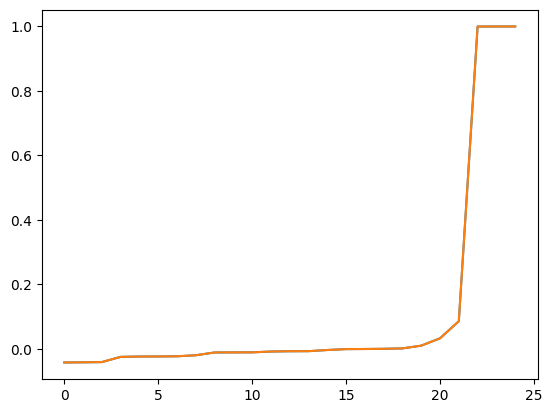

In [65]:
# collatedsim[collatedsim.type=="rep"]["sim"].sort_values().reset_index(drop=True)[::2].plot()
cs_sim_jcp41.plot()
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values().reset_index(drop=True).plot()

In [81]:
rep_sim = collatedsim_jcp41[collatedsim_jcp41.type=="rep"].sort_values("sim").reset_index(drop=True)
rep_sim.groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.041624,2,2,2,2,2,2
-0.041137,2,2,2,2,2,2
-0.040409,2,2,2,2,2,2
-0.024270,2,2,2,2,2,2
-0.023178,2,2,2,2,2,2
-0.023010,2,2,2,2,2,2
-0.022460,2,2,2,2,2,2
-0.019255,2,2,2,2,2,2
-0.010668,2,2,2,2,2,2


In [82]:
rep_sim[::2].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.041624,1,1,1,1,1,1
-0.041137,1,1,1,1,1,1
-0.040409,1,1,1,1,1,1
-0.024270,1,1,1,1,1,1
-0.023178,1,1,1,1,1,1
-0.023010,1,1,1,1,1,1
-0.022460,1,1,1,1,1,1
-0.019255,1,1,1,1,1,1
-0.010668,1,1,1,1,1,1


In [95]:
rep_sim_copair = rep_sim[::2].loc[:, ["id1", "id2", "sim"]]
rep_sim_copair.columns = ["ix1", "ix2", "dist"]
rep_sim_copair

,ix1,ix2,dist
0,4962,13462,-0.041624
2,4962,12794,-0.041137
4,4962,14130,-0.040409
6,4274,13796,-0.024270
8,12794,4274,-0.023178
10,13462,4274,-0.023010
12,4274,14130,-0.022460
14,13796,4962,-0.019255
16,13462,5305,-0.010668
18,13128,4274,-0.010419


In [96]:
collatedsim_jcp41[collatedsim_jcp41.type=="ref"].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.405952,1,1,1,1,1,1
-0.394881,1,1,1,1,1,1
-0.388499,1,1,1,1,1,1
-0.380043,1,1,1,1,1,1
-0.379712,1,1,1,1,1,1
...,...,...,...,...,...,...
0.999796,1,1,1,1,1,1
0.999797,1,1,1,1,1,1
0.999800,1,1,1,1,1,1


In [97]:
ref_sim = collatedsim_jcp41[collatedsim_jcp41.type=="ref"].sort_values("sim").reset_index(drop=True)
ref_sim

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type,sim
0,4962,447,JCP2022_900041,H13,pert,ref,-0.405952
1,13128,389,JCP2022_900041,F08,pert,ref,-0.394881
2,13128,366,JCP2022_900041,F08,pert,ref,-0.388499
3,4962,375,JCP2022_900041,H13,pert,ref,-0.380043
4,13128,361,JCP2022_900041,F08,pert,ref,-0.379712
...,...,...,...,...,...,...,...
8795,12794,642,JCP2022_900041,F08,pert,ref,0.999796
8796,12794,282,JCP2022_900041,F08,pert,ref,0.999797
8797,12794,604,JCP2022_900041,F08,pert,ref,0.999800
8798,13462,604,JCP2022_900041,F08,pert,ref,0.999825


In [98]:
ref_sim_copair = ref_sim.loc[:, ["id1", "id2", "sim"]]
ref_sim_copair.columns = ["ix1", "ix2", "dist"]
ref_sim_copair

,ix1,ix2,dist
0,4962,447,-0.405952
1,13128,389,-0.394881
2,13128,366,-0.388499
3,4962,375,-0.380043
4,13128,361,-0.379712
...,...,...,...
8795,12794,642,0.999796
8796,12794,282,0.999797
8797,12794,604,0.999800
8798,13462,604,0.999825


In [99]:
from copairs.compute_np import compute_ap
from copairs.map import build_rank_lists

In [100]:
rank_lists = build_rank_lists(rep_sim_copair, ref_sim_copair)
rank_lists

ix
1                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
2                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
3                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
4                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
5                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
                               ...                        
12794    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
13128    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
13462    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
13796    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
14130    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: label, Length: 890, dtype: object

In [101]:
ap_scores = rank_lists.apply(compute_ap)
ap_scores = np.concatenate(ap_scores.values)
ap_scores

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [94]:
# when not removing duplicates
np.nanmean(ap_scores) 

0.014153366855976734

In [110]:
# after removing ducplicates
np.nanmean(ap_scores)

0.008077814785247918

In [71]:
collatedsim_jcp41.sort_values("sim", ascending=True).reset_index(drop=True)["sim"]
# add a line for the threshold at 0 on y axis
# plt.axhline(y=0, color='r', linestyle='--')

0      -0.405952
1      -0.394881
2      -0.388499
3      -0.380043
4      -0.379712
          ...   
8845    0.999796
8846    0.999797
8847    0.999800
8848    0.999825
8849    0.999831
Name: sim, Length: 8850, dtype: float64

In [14]:
agg_result = aggregate(result[0], sameby="Metadata_JCP2022", threshold=0.05)
agg_result

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,JCP2022_900006,NaN,4.000043,0.000101,3.995582,True,True
1,JCP2022_900008,NaN,4.000043,0.000101,3.995582,True,True
2,JCP2022_900012,NaN,4.000043,0.000101,3.995582,True,True
3,JCP2022_900014,NaN,4.000043,0.000101,3.995582,True,True
4,JCP2022_900015,NaN,4.000043,0.000101,3.995582,True,True
...,...,...,...,...,...,...,...
3615,JCP2022_915127,NaN,4.000043,0.000101,3.995582,True,True
3616,JCP2022_915128,NaN,4.000043,0.000101,3.995582,True,True
3617,JCP2022_915129,NaN,4.000043,0.000101,3.995582,True,True
3618,JCP2022_915130,NaN,4.000043,0.000101,3.995582,True,True


In [17]:
agg_result_trt = agg_result[(~agg_result.average_precision.isnull()) & (agg_result.Metadata_JCP2022.isin(unique_trts))]
agg_result_trt

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
12,JCP2022_900041,0.008078,0.255758,0.556472,0.254556,False,False
58,JCP2022_900288,0.015682,0.719130,0.192577,0.715395,False,False
108,JCP2022_900475,0.008547,0.308465,0.493148,0.307023,False,False
164,JCP2022_900832,0.008710,0.343029,0.455927,0.341105,False,False
221,JCP2022_901127,0.007628,0.191527,0.644278,0.190927,False,False
700,JCP2022_903189,0.009404,0.362798,0.435880,0.360633,False,False
1084,JCP2022_904840,0.007434,0.251784,0.561432,0.250703,False,False
1189,JCP2022_905399,0.021427,0.688116,0.206718,0.684623,False,False
1272,JCP2022_905771,0.013724,0.365024,0.433771,0.362739,False,False
1420,JCP2022_906380,0.014001,0.527745,0.298720,0.524735,False,False


In [18]:
p_value = agg_result_trt['above_p_threshold']
print(
    f"mmAP: {agg_result_trt.average_precision.mean():.03}",
    f"p<0.05: {p_value.mean():.03} ({p_value.sum()}/{p_value.shape[0]})",
    )

mmAP: 0.0202 p<0.05: 0.027 (1/37)


<Axes: xlabel='average_precision', ylabel='nlog10pvalue'>

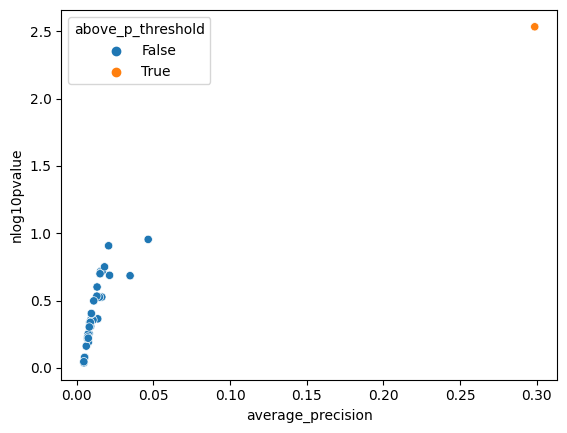

In [21]:
sns.scatterplot(data=agg_result_trt, x="average_precision", y="nlog10pvalue", hue="above_p_threshold")
# sns.kdeplot(data=subset_df, x=x_col, hue=hue_col, ax=ax_kde, legend=False)

In [103]:
# evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/d2311b58/metrics_level_1_ref.parquet")
evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/5f53102a/metrics_level_1_ref.parquet")
evalzoo_l1.drop_duplicates(subset="Metadata_JCP2022", inplace=True)
evalzoo_l1

,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,sim_ranked_relrank_median_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,pert,H13,0.298685,0.296991,0.322498,0.316699,0.544477,0.539545,0.560000,...,5.0,880.0,880.0,0.006668,0.006038,0.00,0.0,0.182394,0.136274,0.146838
2,JCP2022_900288,pert,P06,0.329975,0.329622,0.333446,0.336502,0.195477,0.250455,0.124318,...,5.0,880.0,880.0,0.036395,0.021180,0.00,0.0,1.197970,1.029472,0.197781
4,JCP2022_900475,pert,L13,-0.474840,-0.546475,-0.103877,-0.179479,0.590955,0.632614,0.655341,...,5.0,880.0,880.0,0.007273,0.005336,0.00,0.0,0.217607,0.093481,0.146838
6,JCP2022_900832,pert,P04,-0.289724,-0.490424,0.269515,0.319315,0.428023,0.460341,0.425000,...,5.0,880.0,880.0,0.017682,0.016754,0.00,0.0,0.776773,0.854948,0.197781
8,JCP2022_901127,pert,B06,0.261115,0.269964,0.286786,0.279701,0.565432,0.561477,0.630682,...,5.0,880.0,880.0,0.007173,0.005987,0.00,0.0,0.229857,0.132427,0.146838
10,JCP2022_903189,pert,A14,0.273214,0.268426,0.319562,0.335976,0.488000,0.462386,0.437273,...,5.0,880.0,880.0,0.009382,0.009606,0.00,0.0,0.411399,0.443341,0.197781
12,JCP2022_904840,pert,B08,0.290555,0.281228,0.324940,0.336411,0.423432,0.426477,0.301591,...,5.0,880.0,880.0,0.009403,0.009391,0.00,0.0,0.419035,0.427264,0.197781
14,JCP2022_905399,pert,I14,0.311887,0.313106,0.321418,0.333302,0.421091,0.430682,0.460227,...,5.0,880.0,880.0,0.013898,0.011491,0.00,0.0,0.618535,0.581585,0.197781
16,JCP2022_905771,pert,H13,0.299356,0.305176,0.316025,0.323067,0.539205,0.551818,0.587273,...,5.0,880.0,880.0,0.022687,0.005851,0.04,0.0,0.465497,0.121908,0.197781
18,JCP2022_906380,pert,F23,0.143126,0.158854,0.307271,0.336059,0.505841,0.505568,0.386364,...,5.0,880.0,880.0,0.032049,0.007345,0.02,0.0,0.614180,0.251870,0.197781


In [104]:
jcp_diff = list(set(agg_result_trt.Metadata_JCP2022.unique()).symmetric_difference(set(evalzoo_l1.Metadata_JCP2022.unique())))
jcp_diff

[]

In [105]:
# merge agg_result_trt and evalzoo_l1

merged = pd.merge(agg_result_trt, evalzoo_l1, on="Metadata_JCP2022", how="inner")
merged

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,Metadata_reference_or_other,Metadata_Well,sim_scaled_mean_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,0.008078,0.255758,0.556472,0.254556,False,False,pert,H13,0.298685,...,5.0,880.0,880.0,0.006668,0.006038,0.00,0.0,0.182394,0.136274,0.146838
1,JCP2022_900288,0.015682,0.719130,0.192577,0.715395,False,False,pert,P06,0.329975,...,5.0,880.0,880.0,0.036395,0.021180,0.00,0.0,1.197970,1.029472,0.197781
2,JCP2022_900475,0.008547,0.308465,0.493148,0.307023,False,False,pert,L13,-0.474840,...,5.0,880.0,880.0,0.007273,0.005336,0.00,0.0,0.217607,0.093481,0.146838
3,JCP2022_900832,0.008710,0.343029,0.455927,0.341105,False,False,pert,P04,-0.289724,...,5.0,880.0,880.0,0.017682,0.016754,0.00,0.0,0.776773,0.854948,0.197781
4,JCP2022_901127,0.007628,0.191527,0.644278,0.190927,False,False,pert,B06,0.261115,...,5.0,880.0,880.0,0.007173,0.005987,0.00,0.0,0.229857,0.132427,0.146838
5,JCP2022_903189,0.009404,0.362798,0.435880,0.360633,False,False,pert,A14,0.273214,...,5.0,880.0,880.0,0.009382,0.009606,0.00,0.0,0.411399,0.443341,0.197781
6,JCP2022_904840,0.007434,0.251784,0.561432,0.250703,False,False,pert,B08,0.290555,...,5.0,880.0,880.0,0.009403,0.009391,0.00,0.0,0.419035,0.427264,0.197781
7,JCP2022_905399,0.021427,0.688116,0.206718,0.684623,False,False,pert,I14,0.311887,...,5.0,880.0,880.0,0.013898,0.011491,0.00,0.0,0.618535,0.581585,0.197781
8,JCP2022_905771,0.013724,0.365024,0.433771,0.362739,False,False,pert,H13,0.299356,...,5.0,880.0,880.0,0.022687,0.005851,0.04,0.0,0.465497,0.121908,0.197781
9,JCP2022_906380,0.014001,0.527745,0.298720,0.524735,False,False,pert,F23,0.143126,...,5.0,880.0,880.0,0.032049,0.007345,0.02,0.0,0.614180,0.251870,0.197781


<Axes: xlabel='sim_retrieval_average_precision_ref_i_mean_i', ylabel='average_precision'>

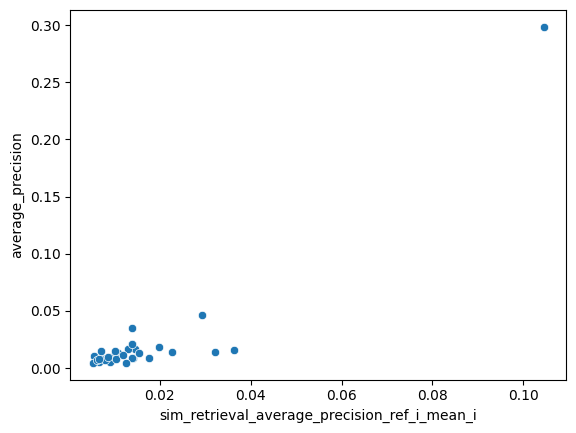

In [106]:
# plot sim_retrieval_average_precision_ref_i_mean_i vs average_precision
sns.scatterplot(data=merged, x="sim_retrieval_average_precision_ref_i_mean_i", y="average_precision")

In [115]:
l_0_1 = pd.read_parquet("../2.evalzoo/results/5f53102a/metrics_level_1_0_ref.parquet")
l_0_1[l_0_1.Metadata_JCP2022=="JCP2022_900041"].sim_retrieval_average_precision_ref_i.sort_values().to_list()

[0.004934323194740791,
 0.00498257195649494,
 0.005011548919240249,
 0.005608170746446612,
 0.005975111925055668,
 0.0061003570367930355,
 0.006157442294585638,
 0.006493234497073149,
 0.007031807446421965,
 0.014386060338362804]

In [114]:
sorted(ap_scores[~np.isnan(ap_scores)])

[0.00478515915036014,
 0.005109309914417456,
 0.005188254003748678,
 0.0052841890409975195,
 0.005500498897588102,
 0.005806045061558079,
 0.006956200262430939,
 0.008549788482687903,
 0.009900087370148107,
 0.023698615668542262]